In [1]:
import numpy as np

In [2]:
# activations

class Relu(object):
    def __call__(self, a):
        return np.maximum(0, a)
    
    def gradient(self, a):
        return np.heaviside(a, 0)

class Tanh(object):
    def __call__(self,x):
        return np.tanh(x)

    def gradient(self, x):
        return 1.0 - np.tanh(x)**2

class Sigmoid(object):
    def __call__(self, a):
        output =  1 / (1 + np.exp(-a))
        self._ouptut = output
        return output
    
    def gradient(self, Y):
        output = self(Y)
        return output * (1 - output)

In [3]:
# loss functions

class CrossEntropy(object):
    def __call__(self, y, T):
        return -(T * np.log(y) + (1 - T) * np.log(1 - y)).mean()
    
    def gradient(self, y, T):
        return (y - T) / y.shape[0]

In [4]:
# general dense layer

class Layer(object):
    def __init__(self, nodes, features, activation, initial_weights=None, initial_bias=None, random_state=None):
        self.activation = activation
        
        if random_state is not None:
            np.random.seed(random_state)
            
        # shape checking
        _weights = np.zeros((features, nodes))
        if initial_weights is not None:
            _weights[:] = initial_weights
        else:
            _weights[:] = np.random.randn(features, nodes) * 0.1
            
        _bias = np.zeros(nodes)
        if initial_bias is not None:
            _bias[:] = initial_bias
            
        self.bias = _bias
        self.weights = _weights
        
    def forward(self, X):
        self._input = X
        
        output = X @ self.weights + self.bias
        activated = self.activation(output)
        
        self._output = activated
        
        return activated
    
    def gradient(self, X, Y, G):
        act_gradient = self.activation.gradient(Y) * G
        
        JW = X.T.dot(act_gradient)
        Jb = np.sum(act_gradient, axis=0)
        JX = act_gradient.dot(self.weights.T)
        return JW, Jb, JX

In [5]:
# full network

class Network(object):
    def __init__(self, features):
        self.features = features
        self.layers = []
    
    def add_layer(self, nodes, activation=None, **kwargs):
        if self.layers:
            input_features = self.layers[-1].weights.shape[1]
        else:
            input_features = self.features
            
        if activation is None:
            activation = lambda x:s
            
        _layer = Layer(nodes, input_features, activation, **kwargs)
        self.layers.append(_layer)
    
    def predict(self, X):
        self.layer_outputs = []
        
        layer_input = X
        for layer in self.layers:
            layer_output = layer.forward(layer_input)
            layer_input = layer_output
            
            self.layer_outputs.append(layer_output)
            
        return self.layer_outputs[-1]
    
    def predict_classes(self, X):
        probabilities = self.predict(X)
            
        if probabilities.shape[-1] > 1:
            return probabilities.argmax(axis=-1)
        else:
            return (probabilities > 0.5).astype(np.int)
    
    def score(self, X, t):
        y = self.predict_classes(X).squeeze()
        return (y == t).mean()

    def train(self, X, t, loss, epochs=1000, learning_rate=0.1):
        history = []
        for epoch in range(epochs):
            y = self.predict(X).squeeze()
            output_grad = loss.gradient(y, t).reshape((-1,1))
            
            for layer in reversed(self.layers):
                cached_input = layer._input
                cached_output = layer._output
                
                dW,db,dX = layer.gradient(cached_input, cached_output, output_grad)
                
                output_grad = dX
                
                layer.weights += -learning_rate * dW
                layer.bias += -learning_rate * db
            
            cost = loss(y, t)
            history.append(cost)
        return history

/Users/adefusco/Applications/miniconda3/envs/dl_from_scratch/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


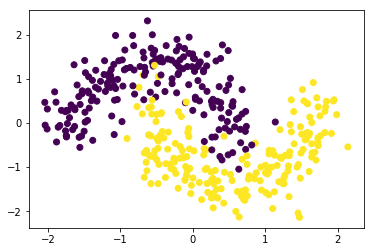

In [6]:
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=400, noise=0.2, random_state=0)
X = scale(X)

plt.scatter(X[:,0], X[:,1], c=y);

In [7]:
model = Network(2)
model.add_layer(5, Tanh(), random_state=42)
model.add_layer(1, Sigmoid(), random_state=42)
        
history = model.train(X, y, loss=CrossEntropy(), epochs=60000)

0.9675


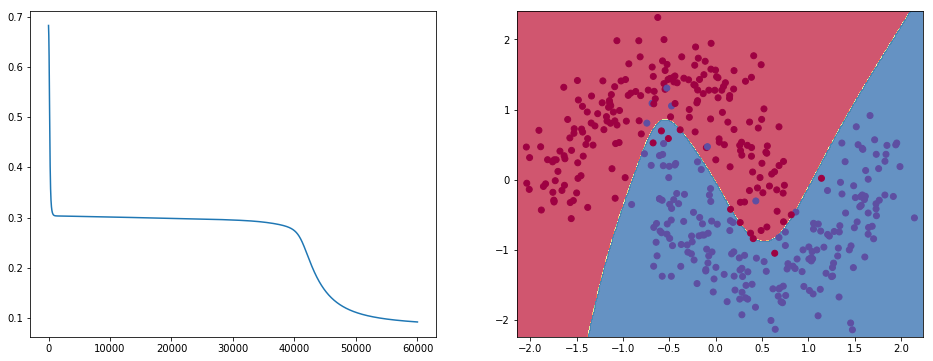

In [8]:
from plots import decision_boundary

print(model.score(X,y))

fig, axes = plt.subplots(ncols=2, figsize=(16,6))

axes[0].plot(history)
decision_boundary(model, X, y, ax=axes[1])

## appendix: pre-trained weights from keras

In [9]:
#relu activation
# w1 = np.array([[ 1.99152803, -0.09389004, -2.69367838, -2.90644741,  0.1731862 ],
#                [-0.77679974, -0.1864475 , -1.41174722, -0.02106327, -0.06677147]], dtype=np.float32)
# b1 = np.array([-1.61310554, -0.3423847 ,  1.15684581, -1.51772845, -0.40788782], dtype=np.float32)

# w2 = np.array([[ 7.81235695],
#        [-0.06182739],
#        [ 3.16168261],
#        [-6.61792564],
#        [-0.57991785]], dtype=np.float32)

# b2 = np.array([-3.90828681], dtype=np.float32)

# tanh activation
w1 = np.array([[ 0.50587463, -6.05083513,  0.4756223 , -0.47560152, -0.48376992],
        [-0.22454669, -1.30784035, -0.22048317,  0.22061934,  0.2181273 ]])#, dtype=np.float32)
b1 = np.array([-0.18400382,  0.03812848,  0.04191707, -0.04608336,  0.06831089])#, dtype=np.float32)

w2 = np.array([[ 3.22500515],
        [ 5.71617699],
        [ 3.92561269],
        [-4.32165861],
        [-2.91170859]])#, dtype=np.float32)
b2 = np.array([ 0.11249582])#, dtype=np.float32)